In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport

# Data Sets

https://www.kaggle.com/azathoth42/myanimelist?select=anime_filtered.csv

This dataset contains informations about Anime and Otaku who watch it. There already is similar dataset https://www.kaggle.com/CooperUnion/anime-recommendations-database but it is few orders of magnitude smaller and is missing many information. This dataset aims to be representative sample of internet otaku community for demographics analysis and trends inside this group. It contains information about users (gender, location, birth date etc.), about anime (airing date, genres, producer…) and anime lists.
Users in MyAnimeList can add anime to their lists, and mark it as plan to watch, completed, watching, dropped…, and they can also rate it by score 1-10.

Note: All information gathered here are publicly available, there was no need to be registered anywhere to access the data.

I did analysis of this dataset, showing various interesting trends in otaku culture, it is accessible in this repo with jupyter notebooks: https://github.com/racinmat/mal-analysis all interesting figures and data are in useranalysis.ipynb and basicanalysis.ipynb.
And powerpoint presentation with all interesting figures is here https://github.com/racinmat/mal-analysis/blob/master/prezantace.pptx

Content
The dataset contains 3 files:

AnimeList.csv contains list of anime, with title, title synonyms, genre, studio, licencor, producer, duration, rating, score, airing date, episodes, source (manga, light novel etc.) and many other important data about individual anime providing sufficient information about trends in time about important aspects of anime. Rank is in float format in csv, but it contains only integer value. This is due to NaN values and their representation in pandas.

UserList.csv contains information about users who watch anime, namely username, registration date (join_date), last online date, birth date, gender, location, and lots of aggregated values from their anime lists.

UserAnimeList.csv contains anime lists of all users. Per each record, here is username, anime ID, score, status and timestamp when was this record last updated.

The dataset as a whole contains

302 675 unique users

302 573 of them with some demographic data

80 076 112 records in anime lists

46 358 322 of them have ratings

14 478 unique anime

There is filtered version of dataset is contained in files animefiltered.csv, animelistsfiltered.csv and users_filtered.csv. It consists of users who have birth date, location and gender filled. So it contains lot less animelists data.
But all important characteristics like rating mean and variation, or genres in animelists is unchanged when ommiting users with some missing data, so even with filtered data we should get same information.
The filtered dataset contains:

116 133 unique users with demographic data

35 802 010 records in anime lists

20 726 794 of them have ratings

14 474 unique anime


There is also cleaned version of the filtered dataset which consists of files animecleaned.csv, animelistscleaned.csv and users_cleaned.csv. This cleaned version has trucated all users with ridiculously large number of episodes in anime which obviously don't have that much episodes, watched episodes larger than number of episodes in individual anime were fixed and seen episodes and watch time were recalculated accordingly. For some users, last online was 1900 year, just weird values, so their last activity was inferred from their last animelist update timestamp.

Many users incorrectly filled number of rewatched episodes. For anime where more episodes have been watched than that anime has episodes, watched episodes have been rewritten to number of episodes in that anime. Watch time and number of watched episodes have been fixed accordingly.

Users too young and too old obviously were truncated too.
6 users with most episodes seen, suspiciously lots of episodes, were truncated here too. That is too few users to affect any statistics.
Anime with unknown studio or unknown source were discarded too. Also anime which were not yet aired were discarded. Their ratings were removed too. Removing them did not affect much other statistics, and without studio or source they did not give much information. Mostly unknown and insignificant anime were removed that way. Airing year was calculated for all remaining anime.

my_status in animelists tables contains integer values. This is their semantics:

1: watching

2: completed

3: on hold

4: dropped

6: plan to watch

other values are not known.

Data gathering methodology: MAL uses username as main identifier for users. Thus they can not be simply iterated over and usernames must be gathered. I gathered usernames from watching challenge 2015-2018 forum threads, and then from MAL clubs. There is ~80k clubs. I crawled first ~40k of these clubs and got usernames from there.

Thanks to Alejandro Augustin you can download user's locations in unified format here.

Acknowledgements
This dataset has been crawled from MyAnimeList.net with https://github.com/racinmat/myanimelist-crawler. This repo is based on https://github.com/Dibakarroy1997/myanimelist-data-set-creator but is fully prepared for long-term data scraping.
It uses https://github.com/TimboKZ/kuristina web-server and https://github.com/pushrbx/python3-mal library for scraping itself.
Thumbnail image is from https://www.pinterest.com/pin/717198309380413746/
Many previous analyses have been made, each of them exploiting different aspects of otaku community. Here are some of them. Lots of them used much smaller dataset, using this data should lead to more precise outputs.

Gender split in anime
Anime genres relations
Temporal analysis of moe genre
temporal analysis of some anime
Inspiration
This dataset may be used either for recommandation system, or for analysis on otaku culture, to see time trends of individual genres, to see tendencies and customs of user ratings, to find simmilarities or differencies between individual user groups…
I already performed one analysis, which is available here: https://github.com/racinmat/mal-analysis

## Anime

In [2]:
anime = pd.read_csv("anime-data/anime_filtered.csv")
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [3]:
anime.shape

(14474, 31)

In [4]:
anime.isna().sum()

anime_id              0
title                 0
title_english      8751
title_japanese       34
title_synonyms     5538
image_url            96
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank               1573
popularity            0
members               0
favorites             0
background        13417
premiered         10378
broadcast         10203
related               0
producer           6186
licensor          11101
studio             5930
genre                64
opening_theme         0
ending_theme          0
dtype: int64

## Users' Anime Lists

In [5]:
%%time
anime_lists = pd.read_csv("anime-data/animelists_filtered.csv")
anime_lists.head()

CPU times: user 35.8 s, sys: 3.67 s, total: 39.5 s
Wall time: 39.3 s


,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,RedvelvetDaisuki,21,0,0000-00-00,0000-00-00,0,3,0.0,0,1355480701,NaN
2,Damonashu,21,418,0000-00-00,0000-00-00,10,1,0.0,0,1254296345,NaN
3,bskai,21,75,0000-00-00,0000-00-00,8,1,0.0,0,1276637483,NaN
4,Slimak,21,834,0000-00-00,0000-00-00,10,1,0.0,0,1525176321,NaN


In [6]:
anime_lists.shape

(35802006, 11)

In [7]:
anime_lists.isna().sum()

username                    261
anime_id                      0
my_watched_episodes           0
my_start_date                 0
my_finish_date                0
my_score                      0
my_status                     0
my_rewatching           7769416
my_rewatching_ep              0
my_last_updated               0
my_tags                33443340
dtype: int64

## Users

In [8]:
users = pd.read_csv('anime-data/users_filtered.csv')
users.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,NaN,2010-05-10,2012-10-18 19:06:00,9.70,6.0,920.0


In [9]:
users.shape

(116133, 17)

In [10]:
users.isna().sum()

username                         1
user_id                          0
user_watching                    0
user_completed                   0
user_onhold                      0
user_dropped                     0
user_plantowatch                 0
user_days_spent_watching         0
gender                           0
location                         6
birth_date                       0
access_rank                 116133
join_date                        0
last_online                      0
stats_mean_score                 0
stats_rewatched                  0
stats_episodes                   0
dtype: int64

## More DataFrames

In [11]:
%%time
merged = pd.merge(anime, anime_lists, on='anime_id')
merged

CPU times: user 57.6 s, sys: 37 s, total: 1min 34s
Wall time: 1min 40s


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,username,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,karthiga,12,0000-00-00,0000-00-00,8,2,NaN,0,1367763899,NaN
1,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,RedvelvetDaisuki,0,0000-00-00,0000-00-00,0,6,0.0,0,1355476045,NaN
2,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,HimeAria,0,0000-00-00,0000-00-00,0,6,0.0,0,1394911574,NaN
3,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Slimak,0,0000-00-00,0000-00-00,0,6,0.0,0,1326731613,NaN
4,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,MistButterfly,12,0000-00-00,0000-00-00,7,2,0.0,0,1371575220,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35802001,37908,Senjou no Valkyria Special,NaN,戦場のヴァルキュリア Valkyria Chronicles,Senjou no Valkyria Fake Movie Promo,https://myanimelist.cdn-dena.com/images/anime/...,Special,Unknown,1,Finished Airing,...,MahouPsycho,0,0000-00-00,0000-00-00,0,6,0.0,0,1526780148,NaN
35802002,37908,Senjou no Valkyria Special,NaN,戦場のヴァルキュリア Valkyria Chronicles,Senjou no Valkyria Fake Movie Promo,https://myanimelist.cdn-dena.com/images/anime/...,Special,Unknown,1,Finished Airing,...,Gino2B,0,0000-00-00,0000-00-00,0,1,0.0,0,1526790813,NaN
35802003,37908,Senjou no Valkyria Special,NaN,戦場のヴァルキュリア Valkyria Chronicles,Senjou no Valkyria Fake Movie Promo,https://myanimelist.cdn-dena.com/images/anime/...,Special,Unknown,1,Finished Airing,...,joestarwolf,0,0000-00-00,0000-00-00,0,6,0.0,0,1526763222,NaN
35802004,37908,Senjou no Valkyria Special,NaN,戦場のヴァルキュリア Valkyria Chronicles,Senjou no Valkyria Fake Movie Promo,https://myanimelist.cdn-dena.com/images/anime/...,Special,Unknown,1,Finished Airing,...,SakataYusuke,1,0000-00-00,0000-00-00,1,2,0.0,0,1526746122,NaN


In [12]:
finished = merged.loc[merged['my_status'] == 2]

"median": median rating by users

"mean": mean rating by users

"my_status": originally referred to status on show; will inform number of viewers who have finished the show 

In [13]:
%%time
df = pd.merge(finished.groupby('anime_id')['my_score'].agg(['median', 'mean']).sort_values(by="median", ascending=False),
              finished.groupby('anime_id')['my_status'].agg('count'), on='anime_id')
df.head()

CPU times: user 3.15 s, sys: 1.82 s, total: 4.97 s
Wall time: 5.4 s


,median,mean,my_status
anime_id,,,
36326,10.0,10.000000,1
5114,10.0,8.623913,47949
37863,10.0,9.000000,3
29381,10.0,10.000000,1
820,10.0,8.644220,3460


In [14]:
%%time
average_scores = pd.merge(df, anime, on='anime_id')
average_scores.head()

CPU times: user 91 ms, sys: 28.7 ms, total: 120 ms
Wall time: 81.7 ms


,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,36326,10.0,10.000000,1,Tamagawa Kyoudai,NaN,玉川兄弟,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Historical,[],[]
1,5114,10.0,8.623913,47949,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Fullmetal Alchemist: Brotherhood is an alterna...,Spring 2009,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ..."
2,37863,10.0,9.000000,3,Diamond Fusion,NaN,アイドリッシュセブン DIAMOND FUSION,IDOLiSH7: Diamon Fusion,https://myanimelist.cdn-dena.com/images/anime/...,Music,...,NaN,NaN,NaN,"{'Other': [{'mal_id': 32031, 'type': 'anime', ...",NaN,NaN,NaN,Music,[],[]
3,29381,10.0,10.000000,1,Kai Douryoku,NaN,快動力,"Free Power, Satisfaction, Kaido-Ryoku, Kaidohr...",NaN,Movie,...,NaN,NaN,NaN,"{'Sequel': [{'mal_id': 29383, 'type': 'anime',...",NaN,NaN,NaN,"Dementia, Sci-Fi",[],[]
4,820,10.0,8.644220,3460,Ginga Eiyuu Densetsu,Legend of the Galactic Heroes,銀河英雄伝説,"LoGH, LotGH, Gin&#039;eiden, GinEiDen, Heldens...",https://myanimelist.cdn-dena.com/images/anime/...,OVA,...,Legend of the Galactic heroes was adapted from...,NaN,NaN,"{'Adaptation': [{'mal_id': 6978, 'type': 'mang...",Kitty Films,Sentai Filmworks,"Artland, Magic Bus","Military, Sci-Fi, Space, Drama","['#1: ""Skies of Love"" by Michiru Akiyoshi (eps...","['#1: ""Hikari no Hashi wo koete"" by Kei Ogura ..."


In [15]:
%%time
with_users = pd.merge(pd.merge(pd.merge(df, finished[['anime_id', 'username']], on="anime_id"), anime, on='anime_id'), users, on='username')
with_users.head()

CPU times: user 1min 20s, sys: 27.6 s, total: 1min 48s
Wall time: 1min 51s


,anime_id,median,mean,my_status,username,title,title_english,title_japanese,title_synonyms,image_url,...,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,36326,10.0,10.000000,1,WeeabooColin,Tamagawa Kyoudai,NaN,玉川兄弟,NaN,https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0
1,5114,10.0,8.623913,47949,WeeabooColin,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0
2,4181,10.0,8.414149,37996,WeeabooColin,Clannad: After Story,Clannad ~After Story~,CLANNAD〜AFTER STORY〜 クラナド アフターストーリー,NaN,https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0
3,28977,10.0,8.452720,6525,WeeabooColin,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0
4,35180,9.0,8.451258,3180,WeeabooColin,3-gatsu no Lion 2nd Season,March Comes In Like A Lion 2nd Season,3月のライオン 第2シリーズ,Sangatsu no Lion Second Season,https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0


In [16]:
finished['type'].unique()

array(['TV', 'Music', 'OVA', 'ONA', 'Special', 'Movie'], dtype=object)

In [17]:
shows = average_scores.loc[average_scores['type'] == 'TV']
movies = average_scores.loc[average_scores['type'] == 'Movie']

## Which anime is ranked the highest amongst MyAnimeList users?

In [18]:
shows_by_rating = shows.sort_values(['median', 'mean'], ascending=[False, False])
movies_by_rating = movies.sort_values(['median', 'mean'], ascending=[False, False])

In [19]:
shows_by_rating.head(20)

,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
6,21981,10.0,10.000000,1,Pic-lele,NaN,ピクレレ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,NaN,Winter 2014,Unknown,[],MMDGP,NaN,Kachidoki Studio,Kids,[],[]
1,5114,10.0,8.623913,47949,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Fullmetal Alchemist: Brotherhood is an alterna...,Spring 2009,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ..."
8,28977,10.0,8.452720,6525,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,TV,...,This is a fourth season of Gintama. In the ep...,Spring 2015,Wednesdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S..."
5,4181,10.0,8.414149,37996,Clannad: After Story,Clannad ~After Story~,CLANNAD〜AFTER STORY〜 クラナド アフターストーリー,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,NaN,Fall 2008,Fridays at 01:59 (JST),"{'Alternative version': [{'mal_id': 1723, 'typ...","Pony Canyon, TBS, Rakuonsha, Animation Do",Sentai Filmworks,Kyoto Animation,"Slice of Life, Comedy, Supernatural, Drama, Ro...","['""Toki wo Kizamu Uta (時を刻む唄)"" by Lia']","['#1: ""TORCH"" by Lia (eps 1-21)', '#2: ""Chiisa..."
22,9253,9.0,8.584891,42331,Steins;Gate,Steins;Gate,STEINS;GATE,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Steins;Gate is based on 5pb. and Nitroplus&#03...,Spring 2011,Wednesdays at 02:05 (JST),"{'Adaptation': [{'mal_id': 17517, 'type': 'man...","Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十..."
59,11061,9.0,8.512158,21179,Hunter x Hunter (2011),Hunter x Hunter,HUNTER×HUNTER ハンターハンター,HxH (2011),https://myanimelist.cdn-dena.com/images/anime/...,TV,...,NaN,Fall 2011,Sundays at 10:55 (JST),"{'Adaptation': [{'mal_id': 26, 'type': 'manga'...","VAP, Nippon Television Network, Shueisha",Viz Media,Madhouse,"Action, Adventure, Super Power, Shounen","['#1: ""departure!"" by Ono Masatoshi (eps 1-26,...","['#1: ""Just Awake"" by Fear, and Loathing in La..."
9,35180,9.0,8.451258,3180,3-gatsu no Lion 2nd Season,March Comes In Like A Lion 2nd Season,3月のライオン 第2シリーズ,Sangatsu no Lion Second Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,NaN,Fall 2017,Saturdays at 23:00 (JST),"{'Adaptation': [{'mal_id': 1224, 'type': 'mang...","Aniplex, Dentsu, NHK, Hakusensha, Asmik Ace En...",Aniplex of America,Shaft,"Drama, Game, Seinen, Slice of Life","['#1: ""Flag wo Tatero (フラッグを立てろ)"" by YUKI', '#...","['#1: ""Kafune (カフネ)"" by Brian the Sun', '#2: ""..."
93,918,9.0,8.392030,13124,Gintama,Gintama,銀魂,"Gin Tama, Silver Soul, Yorinuki Gintama-san",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Several games based on Gintama have been relea...,Spring 2006,Thursdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Audi...","Sentai Filmworks, Crunchyroll",Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...","['#01: ""Pray"" by Tommy heavenly6 (eps 1-24)', ...","['#01: ""Fuusen Gum"" by Captain Straydum (eps 1..."
74,9969,9.0,8.346543,10472,Gintama&#039;,Gintama Season 2,銀

In [20]:
movies_by_rating.head(20)

,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
3,29381,10.0,10.000000,1,Kai Douryoku,NaN,快動力,"Free Power, Satisfaction, Kaido-Ryoku, Kaidohr...",NaN,Movie,...,NaN,NaN,NaN,"{'Sequel': [{'mal_id': 29383, 'type': 'anime',...",NaN,NaN,NaN,"Dementia, Sci-Fi",[],[]
105,37179,9.0,9.000000,1,Mao Yu Tao Hua Yuan,Cats and Peachtopia,猫与桃花源,"Mao Yu Taohua Yuan, Mao Yu Taohuayuan",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,NaN,NaN,NaN,[],NaN,NaN,Light Chaser Animation Studios,"Adventure, Comedy, Fantasy",[],[]
111,29924,9.0,9.000000,1,Goman-hiki,NaN,五万匹,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,NaN,NaN,NaN,"{'Alternative version': [{'mal_id': 20009, 'ty...",Otogi Production,NaN,NaN,Kids,[],[]
16,32281,9.0,8.463504,29346,Kimi no Na wa.,Your Name.,君の名は。,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 99314, 'type': 'man...","Kadokawa Shoten, Toho, Sound Team Don Juan, La...","Funimation, NYAV Post",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']"
110,28851,9.0,8.284200,20183,Koe no Katachi,A Silent Voice,聲の形,"The Shape of Voice, A Silent Voice: The Movie",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 56805, 'type': 'man...","Shochiku, Pony Canyon, Kodansha, ABC Animation...",NYAV Post,Kyoto Animation,"Drama, School, Shounen","['""My Generation (マイ・ジェネレーション)"" by The Who']","['""Koi wo Shita no wa (恋をしたのは)"" by aiko']"
50,15335,9.0,8.235176,7977,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,NaN,劇場版 銀魂 完結篇 万事屋よ永遠なれ,Gintama: The Final Chapter - Be Forever Yorozu...,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 91209, 'type': 'man...","TV Tokyo, Aniplex, Dentsu, Bandai, Warner Bros...",NaN,Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",[],"['#1: ""Genjou Destruction (現状ディストラクション)"" by SP..."
13,7311,9.0,8.084904,24027,Suzumiya Haruhi no Shoushitsu,The Disappearance of Haruhi Suzumiya,涼宮ハルヒの消失,"The Vanishment of Haruhi Suzumiya, Suzumiya Ha...",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,The film won the Best Theatrical Film award at...,NaN,NaN,"{'Adaptation': [{'mal_id': 3083, 'type': 'mang...","Kadokawa Shoten, Animation Do","Funimation, Bandai Entertainment",Kyoto Animation,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...","['""Bouken Desho Desho? (冒険でしょでしょ?)"" by Aya Hir...","['""Yasashii Boukyaku (優しい忘却)"" by Minori Chihara']"
60,12355,9.0,8.069303,20865,Ookami Kodomo no Ame to Yuki,Wolf Children,おおかみこどもの雨と雪,The Wolf Children Ame and Yuki,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Ookami Kodomo no Ame to Yuki won the 2013 Jap...,NaN,NaN,"{'Adaptation': [{'mal_id': 40761, 'type': 'man...","Madhouse, VAP, Dentsu, Yomiuri Telecasting, Ka...",Funimation,Studio Chizu,"Slice of Life, Fantasy",[],"['""Okaa-san no Uta (おかあさんの唄)"" by Ann Sally']"
108,37180,9.0,8.000000,3,A Tang Qi Yu,Tea Pets,阿唐奇遇,"Atang Qiyu, Atang Qi Yu",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,NaN,NaN,NaN,[],NaN,NaN,Light Chaser Animation Studios,"Adventure, Comedy, Kids",[],[]
43,31758,9.0,7.997804,5920,Kizumonogatari III: Reiketsu-hen,NaN,傷物語〈Ⅲ冷血篇〉,"Koyomi Vamp, Kizumonogatari Part 3",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 14893, 'type': 'man...","Aniplex, Kodansha",NaN,Shaft,"Action, Mystery, Supernatural, Vampire",[],"['""étoile et toi [édition le blanc]"" by Clémen..."


## Which anime is the most viewed amongst MyAnimeList users?

In [21]:
shows_by_views = shows.sort_values('my_status', ascending=False)
movies_by_views = movies.sort_values('my_status', ascending=False)

In [22]:
shows_by_views.head(20)

,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
46,1535,9.0,8.113992,72391,Death Note,Death Note,デスノート,DN,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Death Note has been adapted into live action f...,Fall 2006,Wednesdays at 00:56 (JST),"{'Adaptation': [{'mal_id': 21, 'type': 'manga'...","VAP, Konami, Ashi Production, Nippon Televisio...",Viz Media,Madhouse,"Mystery, Police, Psychological, Supernatural, ...","['#1: ""the WORLD"" by Nightmare (eps 1-19)', '#...","['#1: ""Alumina"" by Nightmare (eps 1-19)', '#2:..."
72,1575,9.0,8.146092,56930,Code Geass: Hangyaku no Lelouch,Code Geass: Lelouch of the Rebellion,コードギアス 反逆のルルーシュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Code Geass: Hangyaku no Lelouch is an original...,Fall 2006,Fridays at 01:25 (JST),"{'Adaptation': [{'mal_id': 1528, 'type': 'mang...","Bandai Visual, Mainichi Broadcasting System, B...","Funimation, Bandai Entertainment",Sunrise,"Action, Military, Sci-Fi, Super Power, Drama, ...","['#1: ""COLORS"" by FLOW (eps 1-12)', '#2: ""Kaid...","['#1: ""Yuukyou Seishunka (勇侠青春謳)"" by Ali Proje..."
89,16498,9.0,7.846399,55911,Shingeki no Kyojin,Attack on Titan,進撃の巨人,AoT,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Shingeki no Kyojin adapts content from the fir...,Spring 2013,Sundays at 01:58 (JST),"{'Adaptation': [{'mal_id': 23390, 'type': 'man...","Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,"Action, Military, Mystery, Super Power, Drama,...","['#1: ""Guren no Yumiya (紅蓮の弓矢)"" by Linked Hori...","['#1: ""Utsukushiki Zankoku na Sekai (美しき残酷な世界)..."
707,11757,8.0,7.120341,55617,Sword Art Online,Sword Art Online,ソードアート・オンライン,"S.A.O, SAO",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Sword Art Online adapts the first 4 novels of ...,Summer 2012,Sundays at 00:00 (JST),"{'Adaptation': [{'mal_id': 21479, 'type': 'man...","Aniplex, Genco, DAX Production, ASCII Media Works",Aniplex of America,A-1 Pictures,"Action, Adventure, Fantasy, Game, Romance","['#1: ""crossing field"" by LiSA (eps 2-14)', '#...","['#1: ""crossing field"" by LiSA (eps 1, 25)', '..."
925,226,8.0,7.222449,55343,Elfen Lied,Elfen Lied,エルフェンリート,"Elfen Song, Elfic Song",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Elfen Lied is based on Lynn Okamoto&#039;s sei...,Summer 2004,Sundays at 22:30 (JST),"{'Adaptation': [{'mal_id': 933, 'type': 'manga...","VAP, Genco, A-Line",ADV Films,Arms,"Action, Horror, Psychological, Supernatural, D...","['""Lilium"" by Kumiko Noma']","['""Be Your Girl"" by Chieko Kawabe']"
518,6547,8.0,7.751652,53876,Angel Beats!,Angel Beats!,Angel Beats!（エンジェルビーツ）,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Angel Beats! is an original anime that was cre...,Spring 2010,Unknown,"{'Adaptation': [{'mal_id': 16648, 'type': 'man...","Aniplex, Dentsu, Mainichi Broadcasting System,...",Sentai Filmworks,P.A. Works,"Action, Comedy, Drama, School, Supernatural","['#1: ""My Soul, Your Beats!"" by Lia (TV: eps 2...","['#1: ""Brave Song"" by Aoi Tada (eps 1-9, 11-12..."
97,4224,9.0,7.788251,52038,Toradora!,Toradora!,とらドラ！,Tiger X Dragon,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Toradora! was selected as a recommended work b...,Fall 2008,Thursdays at 01:20 (JST),"{'Adaptation': [{'mal_id': 7149, 'type': 'mang...","Genco, Starchild Records, Magic Capsule, Yomiu...","NIS America, Inc.",J.C.Staff,"Slice of Life, Comedy, Romance, School","['#1: ""Pre-Parade (プレパレード)"" by Rie Kugimiya, Y...","['#1: ""Vanilla Salt (バニラソルト)"" by Yui Horie (ep..."
1089,20,8.0,7.042302,50329,Naruto,Naruto,ナルト,NARUTO,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,Naruto received numerous awards during its air...,Fall 2002,Thursdays at 19:30 (JST),"{'Adaptation': [{'mal_id': 11, 'type': 'manga'...","TV Tokyo, Aniplex, Shueisha",Viz Media,Studio Pierrot,"Action, A

In [23]:
movies_by_views.head(20)

,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
45,199,9.0,7.915686,53004,Sen to Chihiro no Kamikakushi,Spirited Away,千と千尋の神隠し,Sen and Chihiro&#039;s Spiriting Away,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Sen to Chihiro no Kamikakushi is the highest g...,NaN,NaN,[],Toho,"Walt Disney Studios, GKIDS",Studio Ghibli,"Adventure, Supernatural, Drama","['""Day of the River/Ano hi no kawa"" by Joe His...","['""Itsumo Nando demo (Always with Me)"" by Yumi..."
54,431,9.0,7.750442,40203,Howl no Ugoku Shiro,Howl&#039;s Moving Castle,ハウルの動く城,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Howl No Ugoku Shiro premiered at the Venice Fi...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[]
39,164,9.0,7.794404,38206,Mononoke Hime,Princess Mononoke,もののけ姫,Mononoke Hime,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,"In 1997 the film won Best Japanese Movie, Best...",NaN,NaN,[],"Tokuma Shoten, Nippon Television Network",GKIDS,Studio Ghibli,"Action, Adventure, Fantasy","['""Ashitaka Sekki (アシタカせっき; The Legend of Ashi...","['""Mononoke Hime"" by Joe Hisaishi']"
133,1689,8.0,7.400101,37483,Byousoku 5 Centimeter,5 Centimeters Per Second,秒速５センチメートル,"Five Centimeters Per Second, Byousoku 5 Centim...",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Byousoku 5 Centimeter was completed on January...,NaN,NaN,"{'Adaptation': [{'mal_id': 23419, 'type': 'man...",NaN,"ADV Films, Bandai Entertainment, Discotek Medi...",CoMix Wave Films,"Drama, Romance, Slice of Life",[],"['""One more time, one more chance"" by Masayosh..."
654,2236,8.0,7.747045,34354,Toki wo Kakeru Shoujo,The Girl Who Leapt Through Time,時をかける少女,"Toki wo Kakeru Shojo, TokiKake, Toki o Kakeru ...",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,&ldquo;Toki wo Kakeru Shojo&rdquo; is a juveni...,NaN,NaN,"{'Adaptation': [{'mal_id': 4171, 'type': 'mang...","Kadokawa Shoten, Bandai, Memory-Tech, Happinet...","Funimation, Bandai Entertainment, Kadokawa Pic...",Madhouse,"Sci-Fi, Adventure, Drama, Romance","['""夏空～オープニング・テーマ～ (Summer Sky ~ Opening Theme~...","['""Garnet (ガーネット)"" by Oku Hanako']"
983,523,8.0,7.436939,30320,Tonari no Totoro,My Neighbor Totoro,となりのトトロ,My Neighbour Totoro,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,"In 1988, Tonari no Totoro won the Best Film an...",NaN,NaN,"{'Spin-off': [{'mal_id': 2488, 'type': 'anime'...",Studio Fantasia,"Walt Disney Studios, GKIDS",Studio Ghibli,"Adventure, Comedy, Supernatural","['""Sanpo (さんぽ; Stroll)"" by Azumi Inoue']","['""Tonari no Totoro (となりのトトロ; My Neighbor Toto..."
16,32281,9.0,8.463504,29346,Kimi no Na wa.,Your Name.,君の名は。,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 99314, 'type': 'man...","Kadokawa Shoten, Toho, Sound Team Don Juan, La...","Funimation, NYAV Post",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']"
891,430,8.0,6.930438,26638,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist: The Movie - Conqueror of ...,劇場版 鋼の錬金術師 シャンバラを征く者,Gekijyouban Hagane no Renkinjutsushi - Shanbar...,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Fullmetal Alchemist: The Conqueror of Shamball...,NaN,NaN,"{'Prequel': [{'mal_id': 121, 'type': 'anime', ...","Aniplex, Square Enix, Shochiku, Mainichi Broad...",Funimation,Bones,"Military, Comedy, Historical, Drama, Fantasy, ...","['""Link"" by L&#039;Arc~en~Ciel']","['""Lost Heaven"" by L&#039;Arc~en~Ciel']"
1122,32,8.0,7.374434,25190,Neon Genesis Evangelion: The End of Evangelion,Neon Genesis Evangelion: The End of Evangelion,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,Shinseiki Evangelion Ge

## Which are the most popular shows from each genre?

In [24]:
split = average_scores[['anime_id', 'genre', 'type']].apply(lambda x: x.str.replace(' ', '').str.split(',') if x.name in ['genre'] else x)

In [25]:
split

,anime_id,genre,type
0,36326,[Historical],OVA
1,5114,"[Action, Military, Adventure, Comedy, Drama, M...",TV
2,37863,[Music],Music
3,29381,"[Dementia, Sci-Fi]",Movie
4,820,"[Military, Sci-Fi, Space, Drama]",OVA
...,...,...,...
13524,36641,"[Fantasy, Game]",ONA
13525,35233,[Comedy],ONA
13526,26317,"[Comedy, Kids, Supernatural]",OVA
13527,31892,"[Adventure, Fantasy, Historical]",TV


In [26]:
all_genres = split['genre'].explode().value_counts()
all_genres

Comedy           4982
Action           3059
Fantasy          2527
Adventure        2468
Sci-Fi           2171
Drama            2097
Kids             1740
Shounen          1701
Romance          1574
SliceofLife      1415
School           1316
Music            1297
Hentai           1167
Supernatural     1135
Mecha             967
Historical        863
Magic             860
Ecchi             670
Seinen            647
Shoujo            622
Sports            591
Mystery           576
Parody            507
SuperPower        503
Military          463
Space             416
Horror            392
Demons            351
Harem             340
MartialArts       292
Dementia          288
Psychological     272
Game              257
Police            210
Samurai           168
Vampire           118
Thriller           93
Cars               87
Josei              76
ShounenAi          72
ShoujoAi           62
Yuri               41
Yaoi               36
Name: genre, dtype: int64

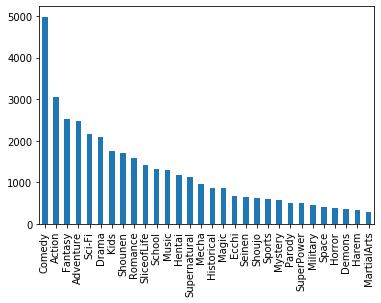

In [27]:
all_genres.iloc[:30].plot(kind='bar');

In [28]:
show_genres = split.loc[split['type'] == 'TV']['genre'].explode().value_counts()
show_genres

Comedy           1942
Action           1148
Adventure         965
Sci-Fi            803
Fantasy           801
Drama             748
Shounen           718
Romance           695
SliceofLife       629
School            608
Kids              498
Supernatural      456
Mecha             388
Magic             378
Historical        301
Shoujo            286
Ecchi             268
Mystery           250
Sports            249
Seinen            248
SuperPower        193
Harem             182
Military          145
Parody            139
Game              133
Space             131
Music             129
Horror            118
Demons            111
Psychological     107
MartialArts       101
Samurai            57
Police             55
Vampire            52
Josei              43
Cars               42
Thriller           34
ShoujoAi           33
ShounenAi          26
Dementia           14
Name: genre, dtype: int64

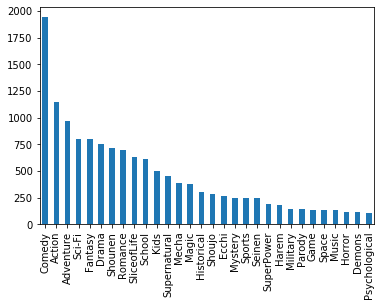

In [29]:
show_genres.iloc[:30].plot(kind='bar');

In [30]:
movie_genres = split.loc[split['type'] == 'Movie']['genre'].explode().value_counts()
movie_genres

Comedy           748
Adventure        686
Fantasy          632
Action           617
Drama            511
Kids             459
Sci-Fi           428
Shounen          355
Historical       239
Dementia         192
Romance          178
SliceofLife      175
Mecha            172
Supernatural     171
Magic            132
Sports           125
Military         121
School           108
SuperPower       103
Space            103
Music            103
Mystery           98
Shoujo            96
Seinen            92
Psychological     74
Horror            70
MartialArts       52
Police            51
Demons            48
Parody            38
Samurai           32
Thriller          25
Game              21
Ecchi             20
Cars              13
Vampire           11
Harem              9
Hentai             8
ShounenAi          5
Josei              3
ShoujoAi           1
Name: genre, dtype: int64

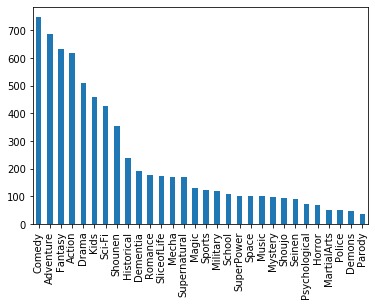

In [31]:
movie_genres.iloc[:30].plot(kind='bar');

In [32]:
len(show_genres.index)

40

In [33]:
len(movie_genres.index)

41

In [34]:
len(set(show_genres.index).intersection(set(movie_genres.index)))

40

In [35]:
# movies have 'hentai' but shows don't 
set(show_genres.index) ^ set(movie_genres.index)

{'Hentai'}

In [36]:
genres = split['genre'].explode().value_counts().index
genres

Index(['Comedy', 'Action', 'Fantasy', 'Adventure', 'Sci-Fi', 'Drama', 'Kids',
       'Shounen', 'Romance', 'SliceofLife', 'School', 'Music', 'Hentai',
       'Supernatural', 'Mecha', 'Historical', 'Magic', 'Ecchi', 'Seinen',
       'Shoujo', 'Sports', 'Mystery', 'Parody', 'SuperPower', 'Military',
       'Space', 'Horror', 'Demons', 'Harem', 'MartialArts', 'Dementia',
       'Psychological', 'Game', 'Police', 'Samurai', 'Vampire', 'Thriller',
       'Cars', 'Josei', 'ShounenAi', 'ShoujoAi', 'Yuri', 'Yaoi'],
      dtype='object')

In [37]:
split.isna().sum()

anime_id     0
genre       53
type         0
dtype: int64

We are dropping 17 values from the dataset because they are missing their genre values. None of the anime in this subset made it to the top 20 rankings, so it does not drastically affect the prior results.

In [38]:
%%time
pd.merge(split[split['genre'].isna()], average_scores, on='anime_id')

CPU times: user 36 ms, sys: 5.15 ms, total: 41.2 ms
Wall time: 42.9 ms


,anime_id,genre_x,type_x,median,mean,my_status,title,title_english,title_japanese,title_synonyms,...,background,premiered,broadcast,related,producer,licensor,studio,genre_y,opening_theme,ending_theme
0,33389,NaN,Movie,7.0,4.666667,3,Genbanojou,NaN,げんばのじょう-玄蕃之丞-,"Wakate Animator Ikusei Project, 2017 Young Ani...",...,NaN,NaN,NaN,"{'Other': [{'mal_id': 33388, 'type': 'anime', ...",NaN,NaN,Nippon Animation,NaN,[],[]
1,17813,NaN,Special,6.0,4.731742,1424,Kyoto Animation: Megane-hen,Glasses,京都アニメーションCM「発想編」,Kyoto Animation CM: Megane-hen,...,NaN,NaN,NaN,"{'Other': [{'mal_id': 13259, 'type': 'anime', ...","Lantis, Rakuonsha, Animation Do",NaN,Kyoto Animation,NaN,[],[]
2,33318,NaN,Movie,6.0,5.142857,7,Scripta Volant,Writings Fly Away,Scripta volant,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,[],[]
3,31509,NaN,Movie,6.0,4.333333,3,Ichi-gan Kuni,NaN,一眼国,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,[],[]
4,30862,NaN,Movie,5.0,4.491228,57,Yubi wo Nusunda Onna,Woman Who Stole Fingers,指を盗んだ女,NaN,...,NaN,NaN,NaN,[],Tokyo University of the Arts,NaN,NaN,NaN,[],[]
5,29765,NaN,Movie,5.0,3.392857,28,Metropolis (2009),NaN,METROPOLIS,NaN,...,NaN,NaN,NaN,[],Mirai Film,NaN,NaN,NaN,[],[]
6,29920,NaN,Movie,5.0,3.928571,14,Kobutori (1957),NaN,こぶとり,NaN,...,NaN,NaN,NaN,"{'Alternative version': [{'mal_id': 5875, 'typ...",NaN,NaN,NaN,NaN,[],[]
7,29921,NaN,Movie,5.0,5.000000,16,Bunbuku Chagama (1958),NaN,ぶんぶくちゃがま,NaN,...,NaN,NaN,NaN,"{'Alternative version': [{'mal_id': 23181, 'ty...","Dentsu, Dentsu Eigasha Tokyo",NaN,NaN,NaN,[],[]
8,29923,NaN,Movie,5.0,4.428571,21,Fukusuke,NaN,ふくすけ,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,[],[]
9,29922,NaN,Movie,5.0,4.153846,13,Ou-sama Ninatta Kitsune,NaN,王様になった狐,NaN,...,NaN,NaN,NaN,[],Dentsu,NaN,NaN,NaN,[],[]


In [39]:
dropped = split.dropna(subset=['genre'])
dropped

,anime_id,genre,type
0,36326,[Historical],OVA
1,5114,"[Action, Military, Adventure, Comedy, Drama, M...",TV
2,37863,[Music],Music
3,29381,"[Dementia, Sci-Fi]",Movie
4,820,"[Military, Sci-Fi, Space, Drama]",OVA
...,...,...,...
13524,36641,"[Fantasy, Game]",ONA
13525,35233,[Comedy],ONA
13526,26317,"[Comedy, Kids, Supernatural]",OVA
13527,31892,"[Adventure, Fantasy, Historical]",TV


In [40]:
%%time
for g in genres:
    dropped[g] = dropped['genre'].apply(lambda x: 1 if g in x else 0)
    
dropped

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CPU times: user 223 ms, sys: 7.21 ms, total: 231 ms
Wall time: 233 ms


,anime_id,genre,type,Comedy,Action,Fantasy,Adventure,Sci-Fi,Drama,Kids,...,Police,Samurai,Vampire,Thriller,Cars,Josei,ShounenAi,ShoujoAi,Yuri,Yaoi
0,36326,[Historical],OVA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,"[Action, Military, Adventure, Comedy, Drama, M...",TV,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,37863,[Music],Music,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29381,"[Dementia, Sci-Fi]",Movie,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,820,"[Military, Sci-Fi, Space, Drama]",OVA,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13524,36641,"[Fantasy, Game]",ONA,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13525,35233,[Comedy],ONA,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13526,26317,"[Comedy, Kids, Supernatural]",OVA,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13527,31892,"[Adventure, Fantasy, Historical]",TV,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
shows_gdf = dropped.loc[dropped['type'] == 'TV']
movies_gdf = dropped.loc[dropped['type'] == 'Movie']

In [42]:
shows_gdf.head()

,anime_id,genre,type,Comedy,Action,Fantasy,Adventure,Sci-Fi,Drama,Kids,...,Police,Samurai,Vampire,Thriller,Cars,Josei,ShounenAi,ShoujoAi,Yuri,Yaoi
1,5114,"[Action, Military, Adventure, Comedy, Drama, M...",TV,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4181,"[SliceofLife, Comedy, Supernatural, Drama, Rom...",TV,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,21981,[Kids],TV,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,28977,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9,35180,"[Drama, Game, Seinen, SliceofLife]",TV,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
movies_gdf.head()

,anime_id,genre,type,Comedy,Action,Fantasy,Adventure,Sci-Fi,Drama,Kids,...,Police,Samurai,Vampire,Thriller,Cars,Josei,ShounenAi,ShoujoAi,Yuri,Yaoi
3,29381,"[Dementia, Sci-Fi]",Movie,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,7311,"[Comedy, Mystery, Romance, School, Sci-Fi, Sup...",Movie,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16,32281,"[Supernatural, Drama, Romance, School]",Movie,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27,5205,"[Action, Mystery, Supernatural, Romance, Thril...",Movie,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
35,25537,"[Action, Fantasy, Magic, Supernatural]",Movie,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Genres in Each Type

In [44]:
all_genres.head(5)

Comedy       4982
Action       3059
Fantasy      2527
Adventure    2468
Sci-Fi       2171
Name: genre, dtype: int64

In [45]:
show_genres.head(5)

Comedy       1942
Action       1148
Adventure     965
Sci-Fi        803
Fantasy       801
Name: genre, dtype: int64

In [46]:
movie_genres.head(5)

Comedy       748
Adventure    686
Fantasy      632
Action       617
Drama        511
Name: genre, dtype: int64

In [47]:
# Top 3 Genres from Shows and Movies appear to be Comedy, Action, Adventure
adding = pd.merge(average_scores, dropped[['anime_id', 'Comedy', 'Action', 'Adventure']], on='anime_id')
adding.head()

,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,related,producer,licensor,studio,genre,opening_theme,ending_theme,Comedy,Action,Adventure
0,36326,10.0,10.000000,1,Tamagawa Kyoudai,NaN,玉川兄弟,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,...,[],NaN,NaN,NaN,Historical,[],[],0,0,0
1,5114,10.0,8.623913,47949,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",1,1,1
2,37863,10.0,9.000000,3,Diamond Fusion,NaN,アイドリッシュセブン DIAMOND FUSION,IDOLiSH7: Diamon Fusion,https://myanimelist.cdn-dena.com/images/anime/...,Music,...,"{'Other': [{'mal_id': 32031, 'type': 'anime', ...",NaN,NaN,NaN,Music,[],[],0,0,0
3,29381,10.0,10.000000,1,Kai Douryoku,NaN,快動力,"Free Power, Satisfaction, Kaido-Ryoku, Kaidohr...",NaN,Movie,...,"{'Sequel': [{'mal_id': 29383, 'type': 'anime',...",NaN,NaN,NaN,"Dementia, Sci-Fi",[],[],0,0,0
4,820,10.0,8.644220,3460,Ginga Eiyuu Densetsu,Legend of the Galactic Heroes,銀河英雄伝説,"LoGH, LotGH, Gin&#039;eiden, GinEiDen, Heldens...",https://myanimelist.cdn-dena.com/images/anime/...,OVA,...,"{'Adaptation': [{'mal_id': 6978, 'type': 'mang...",Kitty Films,Sentai Filmworks,"Artland, Magic Bus","Military, Sci-Fi, Space, Drama","['#1: ""Skies of Love"" by Michiru Akiyoshi (eps...","['#1: ""Hikari no Hashi wo koete"" by Kei Ogura ...",0,0,0


## Comedy

In [48]:
comedy_df = adding.loc[adding['Comedy'] == 1]
comedy_df.head()

,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,related,producer,licensor,studio,genre,opening_theme,ending_theme,Comedy,Action,Adventure
1,5114,10.0,8.623913,47949,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",1,1,1
5,4181,10.0,8.414149,37996,Clannad: After Story,Clannad ~After Story~,CLANNAD〜AFTER STORY〜 クラナド アフターストーリー,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Alternative version': [{'mal_id': 1723, 'typ...","Pony Canyon, TBS, Rakuonsha, Animation Do",Sentai Filmworks,Kyoto Animation,"Slice of Life, Comedy, Supernatural, Drama, Ro...","['""Toki wo Kizamu Uta (時を刻む唄)"" by Lia']","['#1: ""TORCH"" by Lia (eps 1-21)', '#2: ""Chiisa...",1,0,0
8,28977,10.0,8.452720,6525,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1,1,0
11,35247,9.0,8.277151,4254,Owarimonogatari 2nd Season,Owarimonogatari Second Season,終物語,End Story 2nd Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 44227, 'type': 'man...","Aniplex, Kodansha",Aniplex of America,Shaft,"Comedy, Mystery, Supernatural, Vampire","['#1: ""terminal terminal"" by Mayoi Hachikuji (...","['""SHIORI"" by ClariS']",1,0,0
13,7311,9.0,8.084904,24027,Suzumiya Haruhi no Shoushitsu,The Disappearance of Haruhi Suzumiya,涼宮ハルヒの消失,"The Vanishment of Haruhi Suzumiya, Suzumiya Ha...",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,"{'Adaptation': [{'mal_id': 3083, 'type': 'mang...","Kadokawa Shoten, Animation Do","Funimation, Bandai Entertainment",Kyoto Animation,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...","['""Bouken Desho Desho? (冒険でしょでしょ?)"" by Aya Hir...","['""Yasashii Boukyaku (優しい忘却)"" by Minori Chihara']",1,0,0


In [92]:
comedy_shows = comedy_df.loc[comedy_df['type'] == "TV"]
comedy_movies = comedy_df.loc[comedy_df['type'] == "Movie"]

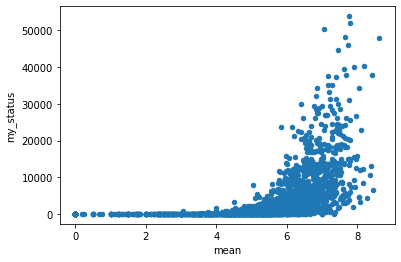

In [88]:
comedy_shows.plot.scatter(x='mean', y='my_status');

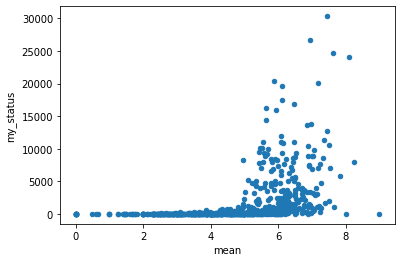

In [93]:
comedy_movies.plot.scatter(x='mean', y='my_status');

## Action

In [49]:
action_df = adding.loc[adding['Action'] == 1]
action_df.head()

,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,related,producer,licensor,studio,genre,opening_theme,ending_theme,Comedy,Action,Adventure
1,5114,10.0,8.623913,47949,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",1,1,1
8,28977,10.0,8.452720,6525,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1,1,0
17,6746,9.0,7.738746,39253,Durarara!!,Durarara!!,デュラララ!!,"Dhurarara!!, Dyurarara!!, Dulalala!!, Dullalal...",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 16816, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Aniplex of America,Brain&#039;s Base,"Action, Mystery, Supernatural","['#1: ""Uragiri no Yuuyake (裏切りの夕焼け; Sunset of ...","['#1: ""Trust Me"" by Yuya Matsushita (eps 1-12)...",0,1,0
23,22535,9.0,7.798239,28276,Kiseijuu: Sei no Kakuritsu,Parasyte -the maxim-,寄生獣 セイの格率,"Parasite, Parasitic Beasts, Parasyte",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 401, 'type': 'manga...","VAP, Kodansha, Nippon Television Network, Fore...",Sentai Filmworks,Madhouse,"Action, Sci-Fi, Horror, Psychological, Drama, ...","['""Let Me Hear"" by Fear, and Loathing in Las V...","['""IT&#039;S THE RIGHT TIME"" by Daichi Miura (...",0,1,0
24,6594,9.0,7.831272,13424,Katanagatari,Katanagatari,刀語,Sword Story,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 18161, 'type': 'man...","Aniplex, Lantis, Kodansha, Movic, Fuji TV","NIS America, Inc.",White Fox,"Action, Adventure, Historical, Martial Arts, R...","['#01: ""Meiya Kadenrou (冥夜花伝廊)"" by Minami Kuri...","['#01: ""Tasogare no Gekka (誰そ彼の月華)"" by Yousei ...",0,1,1


In [94]:
action_shows = action_df.loc[action_df['type'] == "TV"]
action_movies = action_df.loc[action_df['type'] == "Movie"]

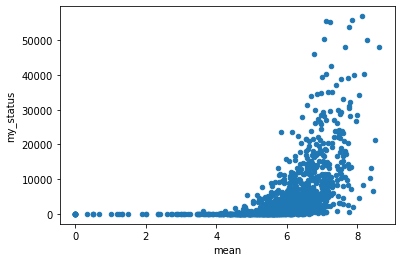

In [96]:
action_shows.plot.scatter(x='mean', y='my_status');

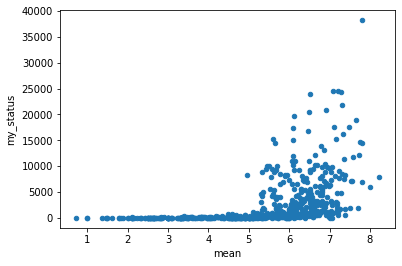

In [97]:
action_movies.plot.scatter(x='mean', y='my_status');

## Adventure

In [50]:
adv_df = adding.loc[adding['Adventure'] == 1]
adv_df.head()

,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,related,producer,licensor,studio,genre,opening_theme,ending_theme,Comedy,Action,Adventure
1,5114,10.0,8.623913,47949,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",1,1,1
12,21939,9.0,7.920807,7829,Mushishi Zoku Shou,MUSHI-SHI -Next Passage-,蟲師 続章,"Mushi-shi Zoku Shou, Mushishi: The Next Chapter",https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 418, 'type': 'manga...","Aniplex, Kodansha, Delfi Sound",Aniplex of America,Artland,"Adventure, Slice of Life, Mystery, Historical,...","['""Shiver"" by Lucy Rose']","['#01: ""Nozue no Utage"" (野末の宴) by Toshio Masud...",0,0,1
18,21329,9.0,7.564461,6151,Mushishi Special: Hihamukage,The Shadow that Devours the Sun,蟲師 特別篇「日蝕む翳」,Mushi-shi Tokubetsu-hen: Hihamu Kage,https://myanimelist.cdn-dena.com/images/anime/...,Special,...,"{'Adaptation': [{'mal_id': 62023, 'type': 'man...","Aniplex, Kodansha, Delfi Sound",NaN,Artland,"Adventure, Slice of Life, Mystery, Historical,...","['""Hihamukage"" (日蝕む翳) - Toshio Masuda']","['""Hinata"" (日向) by Toshio Masuda']",0,0,1
24,6594,9.0,7.831272,13424,Katanagatari,Katanagatari,刀語,Sword Story,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 18161, 'type': 'man...","Aniplex, Lantis, Kodansha, Movic, Fuji TV","NIS America, Inc.",White Fox,"Action, Adventure, Historical, Martial Arts, R...","['#01: ""Meiya Kadenrou (冥夜花伝廊)"" by Minami Kuri...","['#01: ""Tasogare no Gekka (誰そ彼の月華)"" by Yousei ...",0,1,1
25,31933,9.0,7.827402,7306,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,JoJo&#039;s Bizarre Adventure: Diamond is Unbr...,ジョジョの奇妙な冒険 ダイヤモンドは砕けない,JoJo no Kimyou na Bouken Part 4: Diamond wa Ku...,https://myanimelist.cdn-dena.com/images/anime/...,TV,...,"{'Adaptation': [{'mal_id': 3006, 'type': 'mang...","Warner Bros., KlockWorx, Medicos Entertainment...",Viz Media,David Production,"Action, Adventure, Comedy, Supernatural, Drama...","['#1: ""Crazy Noisy Bizarre Town"" by THE DU (ep...","['#1: ""I WANT YOU"" by Savage Garden (eps 2-7, ...",1,1,1


In [98]:
adv_shows = adv_df.loc[adv_df['type'] == "TV"]
adv_movies = adv_df.loc[adv_df['type'] == "Movie"]

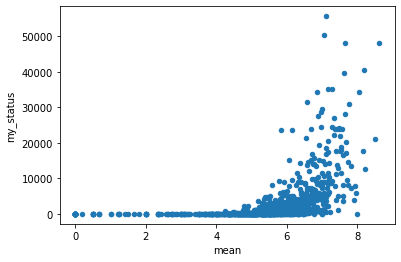

In [99]:
adv_shows.plot.scatter(x='mean', y='my_status');

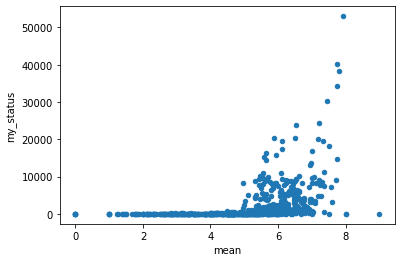

In [100]:
adv_movies.plot.scatter(x='mean', y='my_status');

## Studio Ghibli

In [51]:
movies[movies['studio'] == 'Studio Ghibli']

,anime_id,median,mean,my_status,title,title_english,title_japanese,title_synonyms,image_url,type,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
39,164,9.0,7.794404,38206,Mononoke Hime,Princess Mononoke,もののけ姫,Mononoke Hime,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,"In 1997 the film won Best Japanese Movie, Best...",NaN,NaN,[],"Tokuma Shoten, Nippon Television Network",GKIDS,Studio Ghibli,"Action, Adventure, Fantasy","['""Ashitaka Sekki (アシタカせっき; The Legend of Ashi...","['""Mononoke Hime"" by Joe Hisaishi']"
45,199,9.0,7.915686,53004,Sen to Chihiro no Kamikakushi,Spirited Away,千と千尋の神隠し,Sen and Chihiro&#039;s Spiriting Away,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Sen to Chihiro no Kamikakushi is the highest g...,NaN,NaN,[],Toho,"Walt Disney Studios, GKIDS",Studio Ghibli,"Adventure, Supernatural, Drama","['""Day of the River/Ano hi no kawa"" by Joe His...","['""Itsumo Nando demo (Always with Me)"" by Yumi..."
54,431,9.0,7.750442,40203,Howl no Ugoku Shiro,Howl&#039;s Moving Castle,ハウルの動く城,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Howl No Ugoku Shiro premiered at the Venice Fi...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[]
77,578,9.0,7.730154,21579,Hotaru no Haka,Grave of the Fireflies,火垂るの墓,Tombstone for Fireflies,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Hotaru no Haka is based on the 1967 semi-autob...,NaN,NaN,[],NaN,"ADV Films, Central Park Media, Sentai Filmworks",Studio Ghibli,"Drama, Historical","['""Setsuko and Seita"" by Michio Mamiya']","['""Futari"" by Michio Mamiya']"
130,16662,8.0,7.383178,7811,Kaze Tachinu,The Wind Rises,風立ちぬ,Kaze Tachinu,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,"Before its release, director Miyazaki Hayao de...",NaN,NaN,"{'Adaptation': [{'mal_id': 46318, 'type': 'man...",Nichion,Walt Disney Studios,Studio Ghibli,"Drama, Historical, Romance",[],"['""Hikouki Gumo (ひこうき雲) by Yumi Matsutoya']"
131,16664,8.0,7.460851,4585,Kaguya-hime no Monogatari,The Tale of the Princess Kaguya,かぐや姫の物語,"Kaguyahime no Monogatari, Princess Kaguya Story",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Kaguya-hime no Monogatari is based on the 10th...,NaN,NaN,"{'Alternative version': [{'mal_id': 29927, 'ty...",NaN,GKIDS,Studio Ghibli,"Fantasy, Historical",[],"['""Inochi no Kioku (いのちの記憶)"" by Kazumi Nikaido..."
426,21557,8.0,7.464099,5738,Omoide no Marnie,When Marnie Was There,思い出のマーニー,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Omoide no Marnie is based on Joan G. Robinson&...,NaN,NaN,[],"Dentsu, Toho, Walt Disney Studios, Nippon Tele...",GKIDS,Studio Ghibli,"Mystery, Psychological, Drama",[],"['""Fine on the Outside"" by Priscilla Ahn']"
467,2890,8.0,6.999351,16955,Gake no Ue no Ponyo,Ponyo,崖の上のポニョ,Ponyo on the Cliff by the Sea,https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Gake no Ue no Ponyo&mdash;Miyazaki&#039;s 8th ...,NaN,NaN,[],"Dentsu, d-rights, Toho",Walt Disney Studios,Studio Ghibli,"Adventure, Fantasy",[],"['""Gake no Ue no Ponyo (崖の上のポニョ)"" by Fujioka F..."
752,7711,8.0,7.274992,12204,Karigurashi no Arrietty,The Secret World of Arrietty,借りぐらしのアリエッティ,"Karigurashi no Arrietti, The Borrower Arrietty",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,Karigurashi no Arrietty is Studio Ghibli&rsquo...,NaN,NaN,[],NaN,Walt Disney Studios,Studio Ghibli,Fantasy,"['""The Neglected Garden"" by Cécile Corbel']","['""Arrietty&#039;s song"" by Cécile Corbel']"
781,10029,8.0,7.183724,6009,Coquelicot-zaka kara,From Up on Poppy Hill,コクリコ坂から,"Kokurikozaka kara, Kokuriko-saka kara, Kokurik...",https://myanimelist.cdn-dena.com/images/anime/...,Movie,...,In 2012 the film won the Animation of the Year...,NaN,NaN,"{'Adaptation': [{'mal_id': 23614, 'type': 'man...",Nippon Television Network,GKIDS,Studio Ghibli,"Histor

## Gender (?)

In [53]:
with_users.columns

Index(['anime_id', 'median', 'mean', 'my_status', 'username', 'title',
       'title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'type', 'source', 'episodes', 'status', 'airing', 'aired_string',
       'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'user_id', 'user_watching',
       'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch',
       'user_days_spent_watching', 'gender', 'location', 'birth_date',
       'access_rank', 'join_date', 'last_online', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes'],
      dtype='object')

In [59]:
hes = with_users.loc[with_users['gender'] == 'Male']

In [61]:
hes.head()

,anime_id,median,mean,my_status,username,title,title_english,title_japanese,title_synonyms,image_url,...,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,36326,10.0,10.000000,1,WeeabooColin,Tamagawa Kyoudai,NaN,玉川兄弟,NaN,https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0
1,5114,10.0,8.623913,47949,WeeabooColin,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0
2,4181,10.0,8.414149,37996,WeeabooColin,Clannad: After Story,Clannad ~After Story~,CLANNAD〜AFTER STORY〜 クラナド アフターストーリー,NaN,https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0
3,28977,10.0,8.452720,6525,WeeabooColin,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0
4,35180,9.0,8.451258,3180,WeeabooColin,3-gatsu no Lion 2nd Season,March Comes In Like A Lion 2nd Season,3月のライオン 第2シリーズ,Sangatsu no Lion Second Season,https://myanimelist.cdn-dena.com/images/anime/...,...,142.0,Male,"Denver, Colorado",1998-08-26,NaN,2016-08-08,2018-05-23 20:26:07,5.74,0.0,8702.0


In [62]:
hes.shape

(16810359, 51)

In [63]:
shes = with_users.loc[with_users['gender'] == 'Female']

In [64]:
shes.head()

,anime_id,median,mean,my_status,username,title,title_english,title_japanese,title_synonyms,image_url,...,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
538,5114,10.0,8.623913,47949,RedvelvetDaisuki,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,...,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
539,35180,9.0,8.451258,3180,RedvelvetDaisuki,3-gatsu no Lion 2nd Season,March Comes In Like A Lion 2nd Season,3月のライオン 第2シリーズ,Sangatsu no Lion Second Season,https://myanimelist.cdn-dena.com/images/anime/...,...,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
540,22135,9.0,7.933415,7389,RedvelvetDaisuki,Ping Pong The Animation,Ping Pong the Animation,ピンポン THE ANIMATION,PPTA,https://myanimelist.cdn-dena.com/images/anime/...,...,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
541,7785,9.0,7.943864,7268,RedvelvetDaisuki,Yojouhan Shinwa Taikei,The Tatami Galaxy,四畳半神話大系,"Yojo-Han Shinwa Taikei, Yojou-Han Shinwa Taike...",https://myanimelist.cdn-dena.com/images/anime/...,...,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
542,32281,9.0,8.463504,29346,RedvelvetDaisuki,Kimi no Na wa.,Your Name.,君の名は。,NaN,https://myanimelist.cdn-dena.com/images/anime/...,...,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0


In [65]:
shes.shape

(5761830, 51)

In [66]:
theys = with_users.loc[with_users['gender'] == 'Non-Binary']

In [70]:
theys.head()

,anime_id,median,mean,my_status,username,title,title_english,title_japanese,title_synonyms,image_url,...,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
17001,5114,10.0,8.623913,47949,kendolli,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,...,82.87,Non-Binary,"Wonderland, USA",1990-11-11,NaN,2010-03-03,2017-01-30 03:14:00,6.88,2.0,4849.0
17002,21939,9.0,7.920807,7829,kendolli,Mushishi Zoku Shou,MUSHI-SHI -Next Passage-,蟲師 続章,"Mushi-shi Zoku Shou, Mushishi: The Next Chapter",https://myanimelist.cdn-dena.com/images/anime/...,...,82.87,Non-Binary,"Wonderland, USA",1990-11-11,NaN,2010-03-03,2017-01-30 03:14:00,6.88,2.0,4849.0
17003,32281,9.0,8.463504,29346,kendolli,Kimi no Na wa.,Your Name.,君の名は。,NaN,https://myanimelist.cdn-dena.com/images/anime/...,...,82.87,Non-Binary,"Wonderland, USA",1990-11-11,NaN,2010-03-03,2017-01-30 03:14:00,6.88,2.0,4849.0
17004,20583,9.0,7.782794,20133,kendolli,Haikyuu!!,Haikyu!!,ハイキュー!!,"High Kyuu!!, HQ!!",https://myanimelist.cdn-dena.com/images/anime/...,...,82.87,Non-Binary,"Wonderland, USA",1990-11-11,NaN,2010-03-03,2017-01-30 03:14:00,6.88,2.0,4849.0
17005,22535,9.0,7.798239,28276,kendolli,Kiseijuu: Sei no Kakuritsu,Parasyte -the maxim-,寄生獣 セイの格率,"Parasite, Parasitic Beasts, Parasyte",https://myanimelist.cdn-dena.com/images/anime/...,...,82.87,Non-Binary,"Wonderland, USA",1990-11-11,NaN,2010-03-03,2017-01-30 03:14:00,6.88,2.0,4849.0


In [68]:
theys.shape

(135107, 51)